In [127]:
#this magic command tells jupyter to plot matplotlib charts inline
%matplotlib inline

# the basic data science tools
import numpy as np
import pandas as pd

# pyplot contains the main plotting libraries
import matplotlib.pyplot as plt

A simple plot to check all is working:

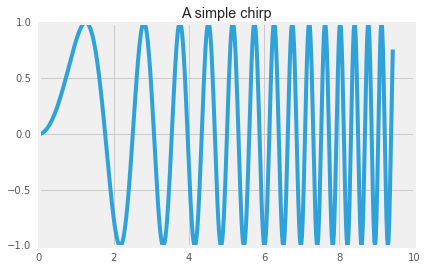

In [128]:
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp');

A scatterplot

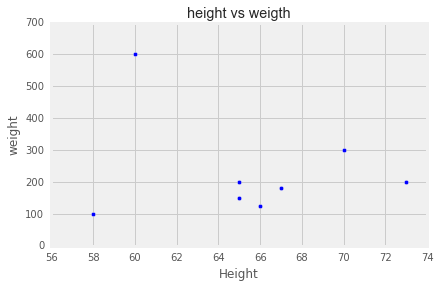

In [129]:
weight = [600,150,200,300,200,100,125,180]
height = [60,65,73,70,65,58,66,67]

plt.scatter(height, weight) 
plt.title('height vs weigth')
plt.xlabel('Height')
plt.ylabel('weight')
plt.show()

A simple line plot plotting the age vs height of a child

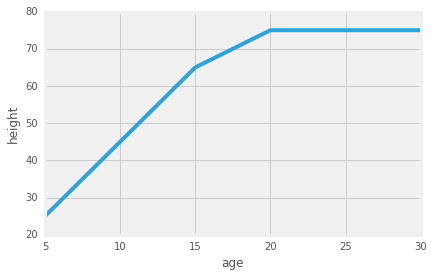

In [130]:
age = [5, 10, 15, 20, 25, 30]
height = [25, 45, 65, 75, 75, 75]
plt.plot(age, height)
plt.xlabel('age'); plt.ylabel('height')
plt.show()

## Bar charts

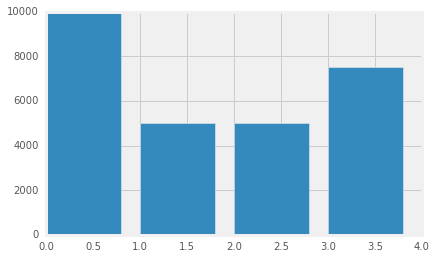

In [131]:
names = ["McDonalds", "Burger King", "Wendys", "Subway"]
patrons = [10000, 5000, 5000, 7500]
x = [0, 1, 2, 3]
plt.bar(x, patrons);

# forest fires in Montesinho National Park in Portugal
Now impporting some data to plot, in this case [forest fire data](https://archive.ics.uci.edu/ml/datasets/Forest+Fires).

- X -- The X position on the grid where the fire occurred.
- Y -- The Y position on the grid where the fire occured.
- month -- the month the fire occcurred.
- day -- the day of the week the fire occurred.
- temp -- the temperature in Celsius when the fire occurred.
- wind -- the wind speed when the fire occurred.
- rain -- the rainfall when the fire occurred.
- area -- the area the fire consumed.

In [132]:
forest_fires = pd.read_csv('data/forestfires.csv')
print(forest_fires.shape)
forest_fires.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Make a scatter plot with the wind column on the x-axis and the area column on the y-axis.

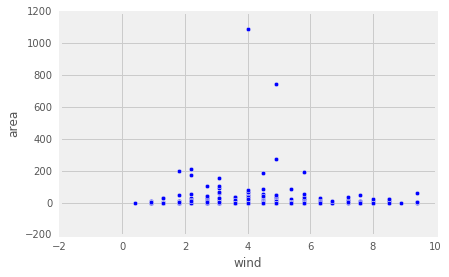

In [133]:
plt.scatter(forest_fires['wind'], forest_fires['area'])
plt.xlabel('wind')
plt.ylabel('area')
plt.show()


Make a scatter plot with the temp column on the x-axis and the area column on the y-axis.

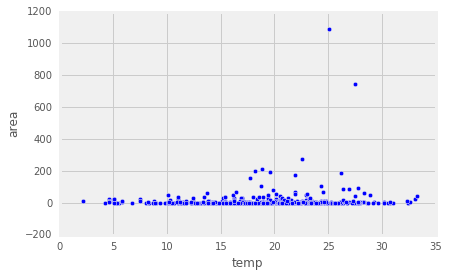

In [134]:
plt.scatter(forest_fires['temp'], forest_fires['area'])
plt.xlabel('temp')
plt.ylabel('area')
plt.show()

> We've used the pivot_table() method to create the area_by_y and area_by_x dataframes. Each dataframe contains the average area of the fires started at each X or Y position in forest_fires. By plotting this out, we'll be able to see which areas in the park are the most flammable.

Plotting the fires at each x or y position on a bar grapgh:

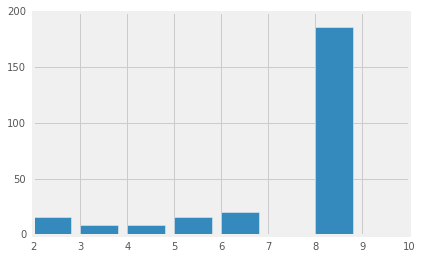

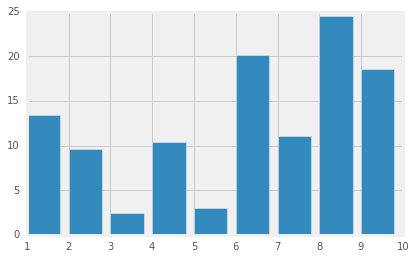

In [135]:
area_by_y = forest_fires.pivot_table(index="Y", values="area", aggfunc=np.mean)
area_by_x = forest_fires.pivot_table(index="X", values="area", aggfunc=np.mean)

plt.bar(area_by_y.index, area_by_y)
plt.show()

plt.bar(area_by_x.index, area_by_x);
plt.show()

To make a horizontal bar chart, use [barh(0)](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh).

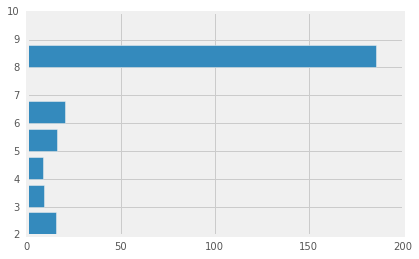

In [136]:
plt.barh(area_by_y.index, area_by_y);
plt.show()

In [137]:
area_by_month = forest_fires.pivot_table(index="month", values="area", aggfunc=np.mean)
area_by_day = forest_fires.pivot_table(index="day", values="area", aggfunc=np.mean)
print(area_by_month)
print(area_by_day)

month
apr     8.891111
aug    12.489076
dec    13.330000
feb     6.275000
jan     0.000000
jul    14.369687
jun     5.841176
mar     4.356667
may    19.240000
nov     0.000000
oct     6.638000
sep    17.942616
Name: area, dtype: float64
day
fri     5.261647
mon     9.547703
sat    25.534048
sun    10.104526
thu    16.345902
tue    12.621719
wed    10.714815
Name: area, dtype: float64


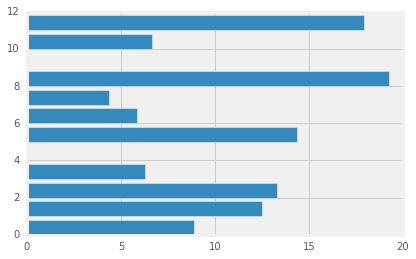

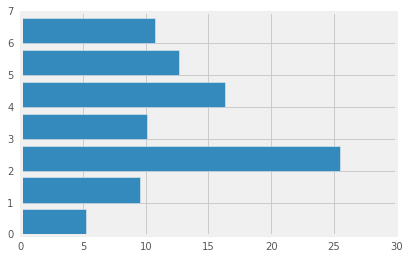

In [138]:
#import seaborn as sns # a beauty treatment for matplotlib

plt.barh(range(len(area_by_month)), area_by_month)
plt.show()
plt.barh(range(len(area_by_day)), area_by_day)
plt.show()

Make a scatter plot with the wind column of forest_fires on the x-axis and the area column of forest_fires on the y-axis.

Give the chart the title Wind speed vs fire area, the y-axis label Area consumed by fire, and the x-axis label Wind speed when fire started.

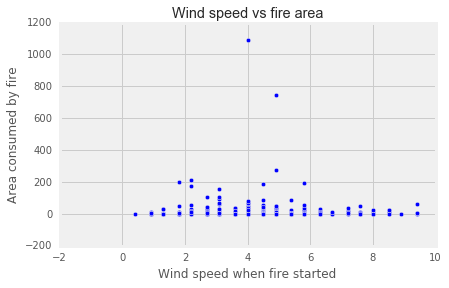

In [139]:
plt.scatter(forest_fires['wind'], forest_fires['area'])
plt.title('Wind speed vs fire area')
plt.xlabel('Wind speed when fire started')
plt.ylabel('Area consumed by fire')
plt.show()

the default matplotlib styles aren't great, so to change the global styles of plots, use [plt.style.use](http://matplotlib.org/users/style_sheets.html). Some decent built in styles are:

- fivethirtyeight -- the style of the plots on the site fivethirtyeight.com.
- ggplot -- the style of the popular R plotting library ggplot.
- dark_background -- will give the plot a darker background.
- bmh -- the style used in a popular online statistics book.

Make a scatter plot the rain column of forest_fires on the x-axis and the area column of forest_fires on the y-axis.

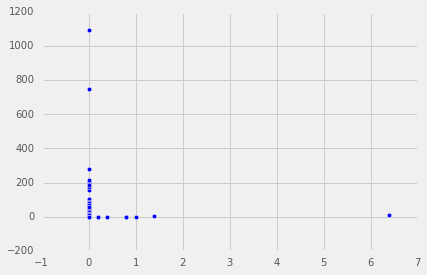

In [142]:
plt.style.use("fivethirtyeight")
plt.scatter(forest_fires['rain'], forest_fires['area'])
plt.show()

# using pandas with matplotlib to explore data

Using [recent grads](https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv) dataset which has data from a survey on job outcomes for recent college graduates based on the major they studied in college.

In [150]:
import pandas as pd
recent_grads = pd.read_csv('data/recent-grads.csv')

print(recent_grads.columns)
print('data size:',recent_grads.shape)
recent_grads.head(3)

Index(['Rank', 'Major_code', 'Major', 'Major_category', 'Total', 'Sample_size',
       'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time', 'Part_time',
       'Full_time_year_round', 'Unemployed', 'Unemployment_rate', 'Median',
       'P25th', 'P75th', 'College_jobs', 'Non_college_jobs', 'Low_wage_jobs'],
      dtype='object')
data size: (173, 21)


,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


Historgrams can help to visulaize the distribution of values [.hist()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html#pandas-dataframe-hist)

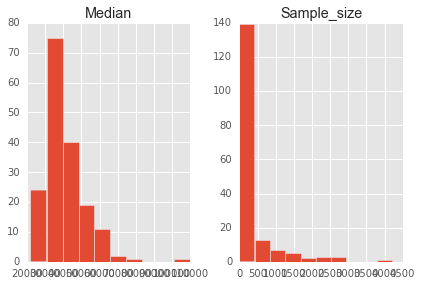

In [172]:
import matplotlib.pyplot as plt #pandas uses matplotlib to make the histograms

columns = ['Median','Sample_size']
recent_grads.hist(column=columns);

The above graph displays the histograms side by side, squishing the x axis too much.

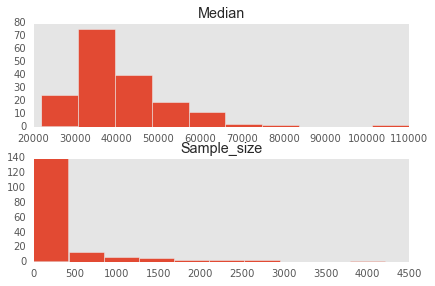

In [173]:
# Set the `layout` parameter as `(2,1)` so the graphs are displayed as 2 rows & 1 column 
# Then set `grid` parameter to `False`.
plt.style.use("ggplot")
recent_grads.hist(column=columns, layout=(2,1), grid=False);

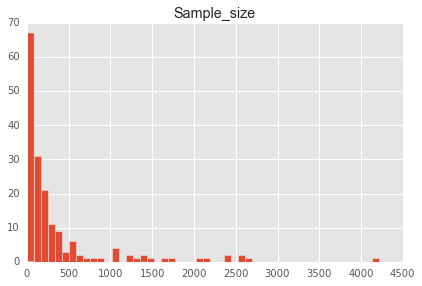

In [175]:
recent_grads.hist(column='Sample_size', bins=50);

## Box plots

> To get a better, high-level sense of how representative the Sample_size for the survey is to the Total number of students who graduated with the major, we'll plot these values to compare visually. Since the values for Sample_size and Total vary quite a bit per major, graphing all 173 majors to compare could make it difficult to compare majors effectively.

> Each major in the dataset is grouped into a category, represented as the value in Major_category for each row. We can utilize this column to make high-level comparisons across the dataset since comparing all 173 majors, even using graphs, would be quite difficult.

> Since we need to be able to easily compare ranges of values against each other, we'll use box plots, which enable us to visualize quartiles of values for a column broken down by Major_category. Box plots are similar to histograms in that the x-axis contain the bins or categories (in this case, the different Major_category values) and the y-axis represents information about values in that category. The difference, however, is that the y-axis doesn't contain a bar for each category but instead contain what's called a box and whisker diagram.

> Let's first generate a boxplot to get a visual idea of what one looks like and we'll walkthrough how they work afterwards.

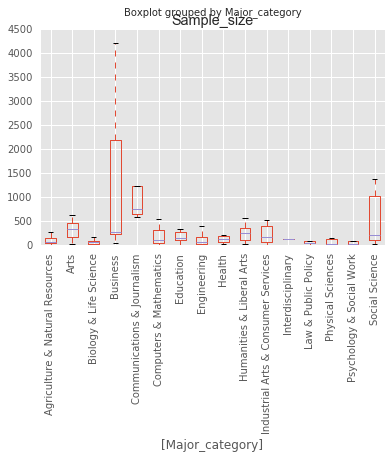

In [178]:
# Select just `Sample_size` & `Major_category` columns from `recent_grads` 
# Name the resulting DataFrame as `sample_size`
sample_size = recent_grads[['Sample_size', 'Major_category']]

# Run the `boxplot()` function on `sample_size` DataFrame and specify, as a parameter, 
# that we'd like a box and whisker diagram to be generated for each unique `Major_category`
sample_size.boxplot(by='Major_category')

# Format the resulting plot to make the x-axis labels (each `Major_category` value) 
# appear vertically instead of horiz;ontally (by rotating 90 degrees)
plt.xticks(rotation=90);

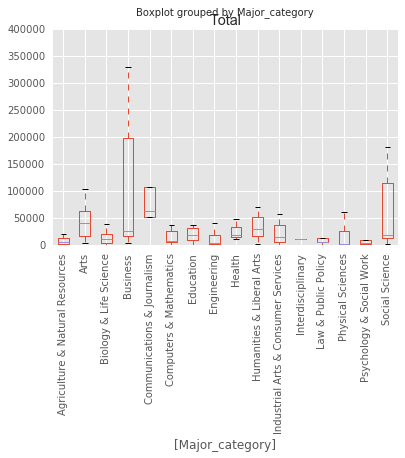

In [180]:
recent_grads[['Total', 'Major_category']].boxplot(by='Major_category')
plt.xticks(rotation=90);

## multiple plots on the same graph

> We now want to explore which variables could play a role in determining a graduate's Median salary in some way. Specifically, we'd like to get a high-level sense of which columns correlate more strongly with the Median salary than others.

> To accomplish this, we can actually generate multiple plots on the same chart and look for any indication of correlation. In the following code cell, we generate 2 scatter plots using the same y-axis but different x-axes and then use plt.show() afterwards to display the 2 plots on the same chart. We then use the color parameter to plot each scatter plot using a different color so we can easily see the difference.

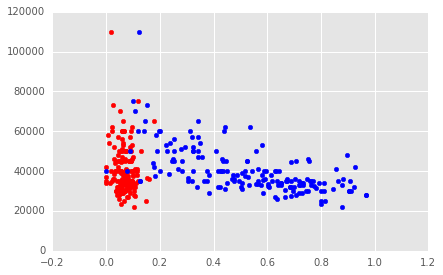

In [183]:
# Plot Unemployment_rate on x-axis, Median salary on y-axis, in red
plt.scatter(recent_grads['Unemployment_rate'], recent_grads['Median'], color='red')
# Plot ShareWomen (Female % in major) on x-axis, Median salary on y-axis, in blue
plt.scatter(recent_grads['ShareWomen'], recent_grads['Median'], color='blue')
plt.show()

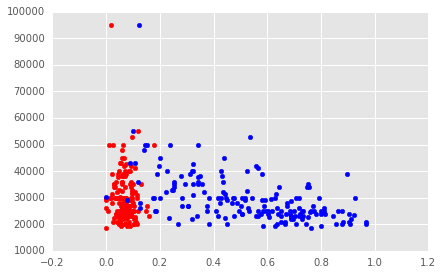

In [184]:
plt.scatter(recent_grads['Unemployment_rate'], recent_grads['P25th'], color='red')
plt.scatter(recent_grads['ShareWomen'], recent_grads['P25th'], color='blue',)
plt.show()

# Seaborn

a quick way to visualize a data set's distrubution is to use [distplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)


[ 1.60855896  0.78380566 -1.62418132 -0.38951139 -0.36539267  0.7442511
  0.73555507  1.51848673  0.40766988  0.03966283]


/Users/ko/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


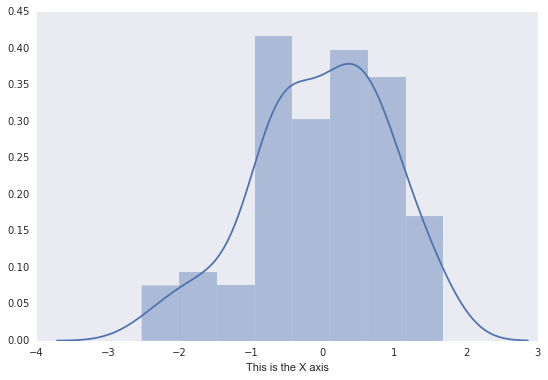

In [226]:
import seaborn as sns
sns.set(color_codes=True, style='dark')

# x is a list of random numbers
x = np.random.normal(size=100)
print(x[:10]) 
sns.distplot(x, axlabel='This is the X axis');

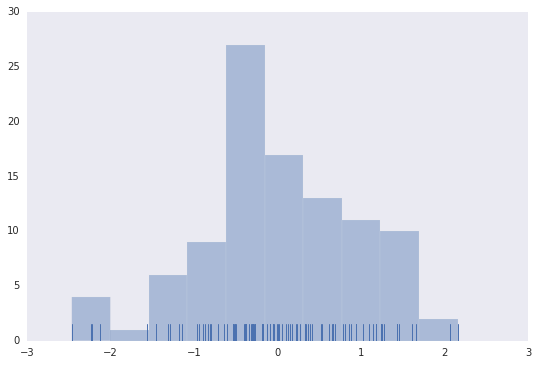

In [203]:
sns.set_style('dark')
sns.distplot(x, kde=False, rug=True);

In [240]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


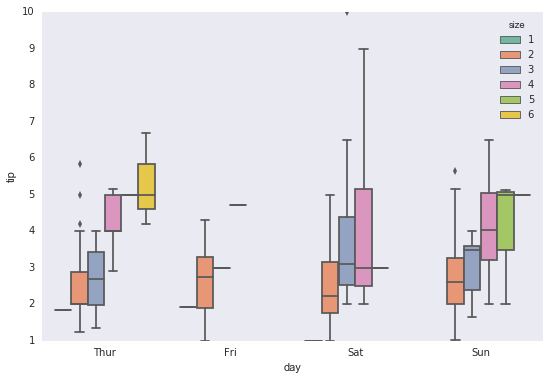

In [242]:
sns.boxplot(x='day', y='tip', hue='size', data=tips, palette='Set2')